# ========================================================
# Dark URL Detection
# Adrien Manciet - Thibault Sourdeval
# ========================================================

In [1]:
#Introduction

Ce dataset est un ensemble d'url qui sont labellisés. Si le label vaut 1, l'url est dangereux, si il vaut -1, il ne l'est pas. L'objectif sera de faire un algorithme de classification des url en apprenant sur le dataset disponible. 

# =========================
# Partie 1 : Phase d'exploration
# =========================

In [2]:
#Code

Nous notons que les fichiers de données sont sous la forme de matrices sparse. Cela signifie que seules les valeurs non nulles sont gardées en mémoire. 
Cela permet d'épargner des erreurs de mémoire. 

Le fichier features contient des numéros qui semblent correspondre à des subdivisions de l'url contenant en blocs. Exemple : la première ligne du fichier features affiche 4, ce qui pourrait correspondre aux quatres premiers caractères de l'url 'http'. 

Nous codons une fonction de prévisualisation pour mieux comprendre la structure des données en les transformant en un dataframe. Pour la suite, 
nous resterons dans le format de données initial.

**Fonction de prévisualisation** 

In [3]:
from sklearn.datasets import load_svmlight_file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def preview_data(day, nb_lines, nb_cols, random = True):
    # Si random est laissé tel quel, une valeur au hasard 
    # est prise pour la première ligne et la première colonne à afficher

    path =f"url_svmlight/url_svmlight/Day{day}.svm"
    X, y = load_svmlight_file(path)
    print(X.shape)

    if random == True:
        start_line = np.random.randint(0, len(y)-nb_lines)
        start_col = np.random.randint(0,X.shape[1])
    else : 
        start_line = int(input("Première ligne à afficher : "))
        start_col = int(input("Première colonne à afficher : "))
    
    label_list = []
    for i in range(start_col, start_col+nb_cols):
        label_list.append(i)

    X_df = pd.DataFrame(X[start_line: start_line+nb_lines, start_col: start_col+nb_cols].toarray(), columns=label_list)
    y_df = pd.DataFrame(y[start_line: start_line+nb_lines], columns=['label'])

    data = pd.concat([X_df, y_df], axis=1)
    return data

preview_data(17, 10, 10, random=False)


,17,18,19,20,21,22,23,24,25,26,label
0,0.845011,0.601523,0.0,0.142856,0.142857,0.000000,1.0,0.0,0.0,0.0,-1.0
1,0.805155,0.470136,0.0,0.142856,0.142857,0.142857,1.0,0.0,0.0,0.0,-1.0
2,0.847691,0.185432,0.0,0.142856,0.142857,0.000000,0.0,0.0,0.0,0.0,-1.0
3,0.000000,0.202819,0.0,0.000990,0.000992,0.000000,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.000000,0.0,0.002975,0.002976,0.000000,1.0,1.0,0.0,0.0,1.0
5,0.822980,0.854082,0.0,0.023808,0.023810,0.023810,1.0,0.0,0.0,0.0,-1.0
6,0.816571,0.146394,1.0,0.285711,0.005952,0.000000,0.0,0.0,0.0,0.0,-1.0
7,0.737675,0.583909,0.0,0.285713,0.011905,0.000000,1.0,1.0,0.0,0.0,-1.0
8,0.752946,0.497025,0.0,0.035713,0.035714,0.035714,1.0,1.0,0.0,0.0,-1.0
9,0.749562,0.389203,0.0,0.142856,0.002976,0.002976,1.0,1.0,0.0,0.0,-1.0


**Visualisations grahiques** 

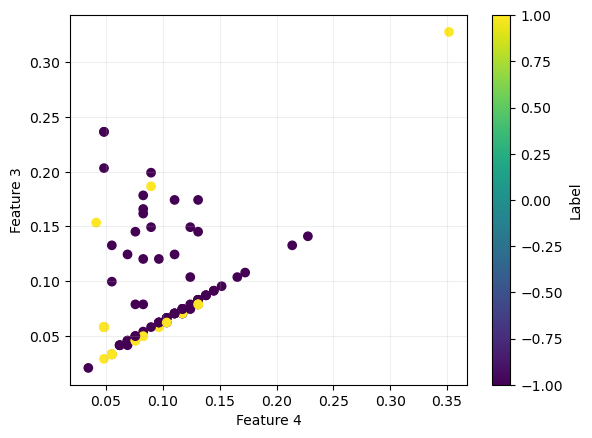

In [4]:
def scatter_plot(day, feature_x, feature_y): 
    path =f"url_svmlight/url_svmlight/Day{day}.svm"
    X, y = load_svmlight_file(path)

    X = X[0:1000,:1000].toarray()
    plt.figure()
    plt.grid(alpha=0.2)
    sc = plt.scatter(X[:,feature_x], X[:,feature_y], c=y[0:1000], cmap="viridis")
    plt.xlabel(f'Feature {feature_x}')
    plt.ylabel(f'Feature {feature_y}')
    

    cbar = plt.colorbar(sc)
    cbar.set_label("Label")
    plt.show()

scatter_plot(11,4,3)

# =========================
# Partie 2 : Feature Engineering
# =========================


--- Réduction des features ---
Shape après suppression des colonnes nulles : (20000, 91661)
Suppression des features très rares (présentes < 5 fois)...
Shape après suppression des features rares : (20000, 8579)

--- PCA ---


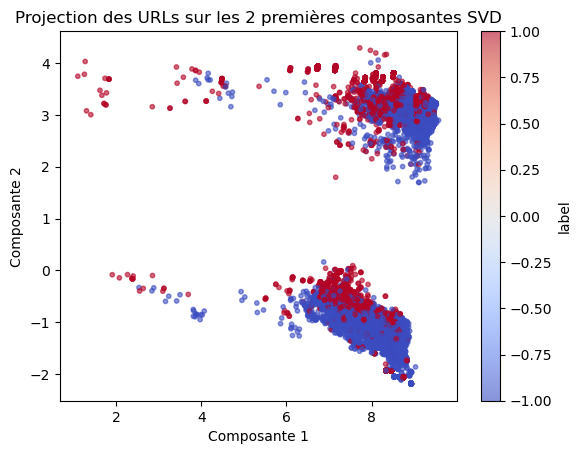

In [5]:
# =============================
# Réduction de features
# =============================
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import TruncatedSVD

print("\n--- Réduction des features ---")

path =f"url_svmlight/url_svmlight/Day96.svm"
X, y = load_svmlight_file(path)

# (a) Supprimer les colonnes complètement nulles
vt = VarianceThreshold(threshold=0.0)
X_reduced = vt.fit_transform(X)

print("Shape après suppression des colonnes nulles :", X_reduced.shape)

# (b) Supprimer les features très rares (optionnel mais utile)
print("Suppression des features très rares (présentes < 5 fois)...")
X_csc = X_reduced.tocsc()
feature_counts = np.diff(X_csc.indptr)
mask = feature_counts >= 5
X_reduced = X_csc[:, mask].tocsr()
print("Shape après suppression des features rares :", X_reduced.shape)

print("\n--- PCA ---")
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)
plt.scatter(X_svd[:,0], X_svd[:,1], c=y, cmap='coolwarm', s=10, alpha=0.6)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.title('Projection des URLs sur les 2 premières composantes SVD')
plt.colorbar(label='label')
plt.show()

Nous commençons par une pca brute pour voir ce que cela peut donner. 

**PCA**

In [6]:
from sklearn.decomposition import TruncatedSVD

X, y = load_svmlight_file('url_svmlight/url_svmlight/Day96.svm')

svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)
# print(X_svd.shape)


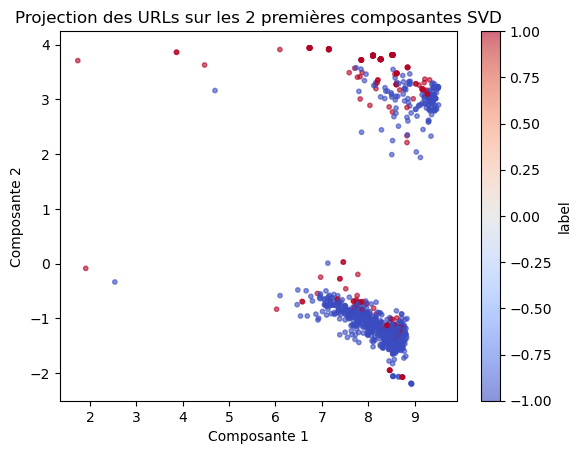

In [7]:
print(svd.explained_variance_ratio_)
plt.scatter(X_svd[:1000,0], X_svd[:1000,1], c=y[:1000], cmap='coolwarm', s=10, alpha=0.6)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.title('Projection des URLs sur les 2 premières composantes SVD')
plt.colorbar(label='label')
plt.show()

In [8]:
A = np.zeros((2,3))
print(A)

[[0. 0. 0.]
 [0. 0. 0.]]


Constatant l'efficacité toute relative de cette PCA, nous décidons de retravailler sur les données d'entrées afin d'éliminer dès le départ des features à trop faible variance.
Nous remarquons que beaucoup de colonnes sont nulles sur la prévisualisation, il faut les retirer du dataset. 
La difficulté est de parcourir tous les fichiers svm. 

Comme beaucoup de nos colonnes de features ne contiennent que des 0 ou des 1, et que cela ne permettra pas la classification, nous décidons d'enlever ces colonnes dans les données qui serveront à l'apprentissage. 

Pour ce faire, nous utilisons un critère sur la variance minimale d'une colonne dans chaque fichier. Puis, nous regardons le nombre de fichier pour lesquels une colonne a été gardée. Nous mesurons cela en pourcentage. Exemple : la colonne 1 a une variance supérieure au critère minimal dans les fichiers 1 à 10, mais pas dans les fichiers 11 à 20. Ainsi, l'algorithme a gardé la colonne un pour les fichiers 1 à 10 et l'a enlevée dans les autres. Au total, la colonne 1 a été gardée dans 50% des cas.

Dans un premier temps, nous gardons les colonnes dès lors qu'elles sont gardées au moins une fois, soit que leur pourcentage d'apparition est strictement positif. Nous pourrons raffiner cela pour garder moins de features si on voit que cela améliore la performance de la méthode d'apprentissage.

In [18]:
from sklearn.feature_selection import VarianceThreshold
import os

data_dir = "url_svmlight/url_svmlight"
X_list, y_list = [], []



selector = VarianceThreshold(threshold=0.01)

for file in sorted(os.listdir(data_dir))[:10]:  # exemple sur 10 jours
    X, y = load_svmlight_file(os.path.join(data_dir, file))
    # print('passage')
    X_list.append(X)
    y_list.append(y)


kept_mask = []
for i in range(len(X_list)):
    X_reduced = selector.fit_transform(X_list[i])
    print(X_list[i].shape, "→", X_reduced.shape)
    keep_mask = selector.get_support()
    kept_mask.append(np.where(keep_mask)[0])


(16000, 3231949) → (16000, 478)
(20000, 3231955) → (20000, 502)
(20000, 3231953) → (20000, 492)
(20000, 3231958) → (20000, 509)
(20000, 3231958) → (20000, 524)
(20000, 3231943) → (20000, 531)
(20000, 3231958) → (20000, 529)
(20000, 3231958) → (20000, 483)
(20000, 3231924) → (20000, 475)
(20000, 3231939) → (20000, 469)


In [14]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_svmlight_file
import os

data_dir = "url_svmlight/url_svmlight"
X_list, y_list = [], []

max_features = 3300000  # à adapter à ton dataset

selector = VarianceThreshold(threshold=0.01)
kept_mask_list = []

# Boucle sur les fichiers
for file in sorted(os.listdir(data_dir))[:10]:  # exemple sur 10 jours
    X, y = load_svmlight_file(os.path.join(data_dir, file), n_features=max_features)
    X_list.append(X)
    y_list.append(y)

    X_reduced = selector.fit_transform(X)
    keep_mask = selector.get_support()  # booléen : True si la colonne est gardée
    kept_mask_list.append(keep_mask)

# Transformer en matrice 2D : fichiers × colonnes
kept_mask_matrix = np.array(kept_mask_list, dtype=int)

# Pourcentage de fois où chaque colonne est gardée
column_keep_percentage = kept_mask_matrix.mean(axis=0) * 100

# Créer DataFrame en ne gardant que les colonnes qui ont été sélectionnées au moins une fois
df_keep = pd.DataFrame({
    'column_index': np.arange(len(column_keep_percentage)),
    'percent_kept': column_keep_percentage
})

# Filtrer les colonnes jamais gardées
df_keep = df_keep[df_keep['percent_kept'] > 0]
# Trier par pourcentage décroissant si tu veux
# df_keep = df_keep.sort_values(by='percent_kept', ascending=False).reset_index(drop=True)

# Afficher un aperçu
# print(df_keep.head(30))



Sélection des données d'entraînement :

In [15]:
import scipy.sparse as sp

selected_columns = df_keep['column_index'].values

X_filtered_list, y_filtered_list = [],[]

for file in sorted(os.listdir(data_dir))[:10]:
    X,y = load_svmlight_file(os.path.join(data_dir, file), n_features=max_features)

    X_filtered = X[:,selected_columns]
    X_filtered_list.append(X_filtered)
    y_filtered_list.append(y)


X_all = sp.vstack(X_filtered_list)
y_all = np.concatenate(y_filtered_list)

**PCA sur les données filtrées**

In [13]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# X_reduced_scaled = StandardScaler().fit_transform(X_reduced)

# pca = PCA(n_components=2)
# pca.fit(X_reduced_scaled)
# X_reduced_proj = pca.transform(X_reduced_scaled)
# print(pca.explained_variance_ratio_)

# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# plt.scatter(X_reduced[:,15], X_reduced[:,16],c = y, cmap='viridis', alpha=0.5)
# plt.grid(alpha=0.2)
# plt.title('Dans les coordonées de base')
# plt.colorbar(label='label')

# plt.subplot(1,2,2)
# plt.scatter(X_reduced_proj[:,0], X_reduced_proj[:,1], c = y, cmap='viridis', alpha=0.5)
# plt.xlabel('Première composante principale')
# plt.ylabel('Deuxième composante principale')
# plt.colorbar(label='label')
# plt.grid(alpha=0.2)

# plt.show()



# =========================
# Partie 3 : Phase d'apprentissage
# =========================

In [8]:
#SVM
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from time import time


# ⚠️ Important : un kernel RBF ne gère pas directement les matrices sparse.
# On convertit donc un échantillon en dense (en RAM attention)
# Si ton dataset est trop gros, on prend un sous-échantillon.
if X_reduced.shape[0] > 5000 or X_reduced.shape[1] > 5000:
    print("Dataset trop volumineux — on prend un échantillon de 5000 URLs pour la démonstration.")
    from sklearn.utils import resample
    X_reduced, y = resample(X_reduced, y, n_samples=5000, random_state=42)
    X_reduced = X_reduced.toarray()  # conversion en dense
else:
    X_reduced = X_reduced.toarray()

# =========================
# 2️⃣ Séparer train/test
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

# Normalisation recommandée pour SVM RBF
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# =========================
# 3️⃣ Entraînement SVM (kernel trick)
# =========================
print("\n--- Entraînement du SVM avec noyau RBF ---")

svm_model = SVC(
    kernel='rbf',     # 'linear', 'poly', 'rbf', 'sigmoid'...
    C=1.0,            # paramètre de régularisation
    gamma='scale',    # influence du noyau RBF (auto ou 'scale')
    class_weight='balanced',  # utile si les classes sont déséquilibrées
)

t0 = time()
svm_model.fit(X_train, y_train)
t1 = time()

print(f"✅ Modèle entraîné en {t1 - t0:.2f} secondes")

# =========================
# 4️⃣ Évaluation
# =========================
y_pred = svm_model.predict(X_test)

print("\n--- Évaluation du modèle ---")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Dataset trop volumineux — on prend un échantillon de 5000 URLs pour la démonstration.

--- Entraînement du SVM avec noyau RBF ---
✅ Modèle entraîné en 58.81 secondes

--- Évaluation du modèle ---
Accuracy : 0.928

Matrice de confusion :
 [[678  18]
 [ 54 250]]

Rapport de classification :
               precision    recall  f1-score   support

        -1.0       0.93      0.97      0.95       696
         1.0       0.93      0.82      0.87       304

    accuracy                           0.93      1000
   macro avg       0.93      0.90      0.91      1000
weighted avg       0.93      0.93      0.93      1000



Commençons par un svm naïf. 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42, stratify=y_all)

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Entraînement pur :

In [17]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


svm = LinearSVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

print('Précision de : ', accuracy_score(y_test, y_pred))
print("\nRésumé de classification:\n", classification_report(y_test, y_pred))
print("\nMatrice de confusion:\n", confusion_matrix(y_test,y_pred))

Précision de :  0.9761734693877551

Résumé de classification:
               precision    recall  f1-score   support

        -1.0       0.98      0.98      0.98     25216
         1.0       0.97      0.97      0.97     13984

    accuracy                           0.98     39200
   macro avg       0.97      0.97      0.97     39200
weighted avg       0.98      0.98      0.98     39200


Matrice de confusion:
 [[24738   478]
 [  456 13528]]


# =========================
# Partie 4 : Tuning d'un hyperparamètre
# =========================

In [9]:
#Code

# =========================
# Partie 5 : Conclusions
# =========================

In [10]:
#Code

In [11]:
path =f"url_svmlight/url_svmlight/Day1.svm"
X, y = load_svmlight_file(path)
print(X)
print(y)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2304202 stored elements and shape (20000, 3231955)>
  Coords	Values
  (0, 3)	0.0788382
  (0, 4)	0.124138
  (0, 5)	0.117647
  (0, 10)	0.285714
  (0, 15)	0.1
  (0, 16)	0.723562
  (0, 17)	0.688263
  (0, 18)	0.274458
  (0, 20)	0.142856
  (0, 21)	0.142857
  (0, 22)	0.142857
  (0, 23)	1.0
  (0, 24)	1.0
  (0, 27)	1.0
  (0, 35)	1.0
  (0, 43)	1.0
  (0, 61)	1.0
  (0, 63)	1.0
  (0, 65)	1.0
  (0, 67)	1.0
  (0, 69)	1.0
  (0, 71)	1.0
  (0, 81)	1.0
  (0, 83)	1.0
  (0, 85)	1.0
  :	:
  (19999, 155193)	1.0
  (19999, 155194)	1.0
  (19999, 155195)	1.0
  (19999, 155196)	1.0
  (19999, 155197)	1.0
  (19999, 155198)	1.0
  (19999, 155199)	1.0
  (19999, 155200)	1.0
  (19999, 155201)	1.0
  (19999, 155202)	1.0
  (19999, 155203)	1.0
  (19999, 155204)	1.0
  (19999, 155205)	1.0
  (19999, 155206)	1.0
  (19999, 155207)	1.0
  (19999, 155208)	1.0
  (19999, 155209)	1.0
  (19999, 155210)	1.0
  (19999, 155211)	1.0
  (19999, 155212)	1.0
  (19999, 424434)	1.0
  (1

In [12]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.datasets import load_svmlight_file
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle
from time import time

# =============================
# 1️⃣ Charger le fichier .svm
# =============================
print("Chargement du dataset...")
X, y = load_svmlight_file(path)  # <-- à adapter à ton chemin
print(f"Shape initial : {X.shape}")
print(f"Nombre d'éléments non nuls : {X.nnz}")
print(f"Taux de sparsité : {100*(1 - X.nnz/(X.shape[0]*X.shape[1])):.6f}%")

# Mélanger pour éviter un ordre biaisé
X, y = shuffle(X, y, random_state=42)

# =============================
# 2️⃣ Séparer train/test
# =============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# 3️⃣ Entraînement avant nettoyage
# =============================
print("\n--- Entraînement AVANT réduction ---")
clf = LogisticRegression(max_iter=1000)
t0 = time()
clf.fit(X_train, y_train)
t1 = time()
y_pred = clf.predict(X_test)
print(f"Temps d'entraînement : {t1 - t0:.2f}s")
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# =============================
# 4️⃣ Réduction de features
# =============================
print("\n--- Réduction des features ---")

# (a) Supprimer les colonnes complètement nulles
vt = VarianceThreshold(threshold=0.0)
X_reduced = vt.fit_transform(X)

print("Shape après suppression des colonnes nulles :", X_reduced.shape)

# (b) Supprimer les features très rares (optionnel mais utile)
print("Suppression des features très rares (présentes < 5 fois)...")
X_csc = X_reduced.tocsc()
feature_counts = np.diff(X_csc.indptr)
mask = feature_counts >= 5
X_reduced = X_csc[:, mask].tocsr()
print("Shape après suppression des features rares :", X_reduced.shape)

# =============================
# 5️⃣ Réentraînement après réduction
# =============================
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

print("\n--- Entraînement APRÈS réduction ---")
clf2 = LogisticRegression(max_iter=1000)
t0 = time()
clf2.fit(X_train, y_train)
t1 = time()
y_pred = clf2.predict(X_test)
print(f"Temps d'entraînement : {t1 - t0:.2f}s")
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("\n✅ Script terminé avec succès.")


Chargement du dataset...
Shape initial : (20000, 3231955)
Nombre d'éléments non nuls : 2304202
Taux de sparsité : 99.996435%

--- Entraînement AVANT réduction ---
Temps d'entraînement : 65.96s
Accuracy : 0.9835
              precision    recall  f1-score   support

        -1.0       0.99      0.98      0.99      2679
         1.0       0.96      0.99      0.98      1321

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000


--- Réduction des features ---
Shape après suppression des colonnes nulles : (20000, 86903)
Suppression des features très rares (présentes < 5 fois)...
Shape après suppression des features rares : (20000, 9144)

--- Entraînement APRÈS réduction ---
Temps d'entraînement : 1.77s
Accuracy : 0.9815
              precision    recall  f1-score   support

        -1.0       0.99      0.98      0.99      2679
         1.0       0.96      0.98      0.97      1321

 